In [1]:
import sys

import kornia.augmentation as K
import torch
import pandas as pd
import torch.nn as nn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from src.models import get_model_by_name
from src.datasets.eurosat import EuroSATMinimal
from src.utils import extract_features

device = torch.device("cuda:0")
ROOT = "/workspace/storage/data/eurosat"
model_name = "resnet50_pretrained_imagenet"
rgb = True

In [2]:
size = 64
transforms = nn.Sequential(K.Resize(size)).to(device)
dm = EuroSATMinimal(
    root=ROOT,
    band_set="rgb" if rgb else "all",
    normalization_method="standardization",
    batch_size=64,
    num_workers=8,
    use_both_trainval=False,
)
dm.setup()
model = get_model_by_name(
    model_name, rgb, device=device, dataset=dm.train_dataset, seed=0
)
x_test, y_test = extract_features(
    model, dm.test_dataloader(), device, transforms=transforms, verbose=True
)
x_test_scaled = StandardScaler().fit_transform(x_test)
x_test_pca = PCA(n_components=50).fit_transform(x_test_scaled)
df = pd.DataFrame(x_test_pca)
df["y"] = y_test
tsne = TSNE(
    n_components=2, verbose=2, perplexity=40, n_iter=1000, n_iter_without_progress=300
)
tsne_results = tsne.fit_transform(x_test_pca)

100%|██████████| 85/85 [00:03<00:00, 25.77it/s]
/root/miniconda3/envs/torchgeo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/torchgeo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5400 samples in 0.000s...
[t-SNE] Computed neighbors for 5400 samples in 0.609s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5400
[t-SNE] Computed conditional probabilities for sample 2000 / 5400
[t-SNE] Computed conditional probabilities for sample 3000 / 5400
[t-SNE] Computed conditional probabilities for sample 4000 / 5400
[t-SNE] Computed conditional probabilities for sample 5000 / 5400
[t-SNE] Computed conditional probabilities for sample 5400 / 5400
[t-SNE] Mean sigma: 3.223686
[t-SNE] Computed conditional probabilities in 0.192s
[t-SNE] Iteration 50: error = 83.8782883, gradient norm = 0.0056022 (50 iterations in 0.739s)
[t-SNE] Iteration 100: error = 80.3626480, gradient norm = 0.0008223 (50 iterations in 0.781s)
[t-SNE] Iteration 150: error = 79.8046722, gradient norm = 0.0006827 (50 iterations in 0.684s)
[t-SNE] Iteration 200: error = 79.7707367, gradient norm = 0.0002693 (50 iterations in 0.678s)
[

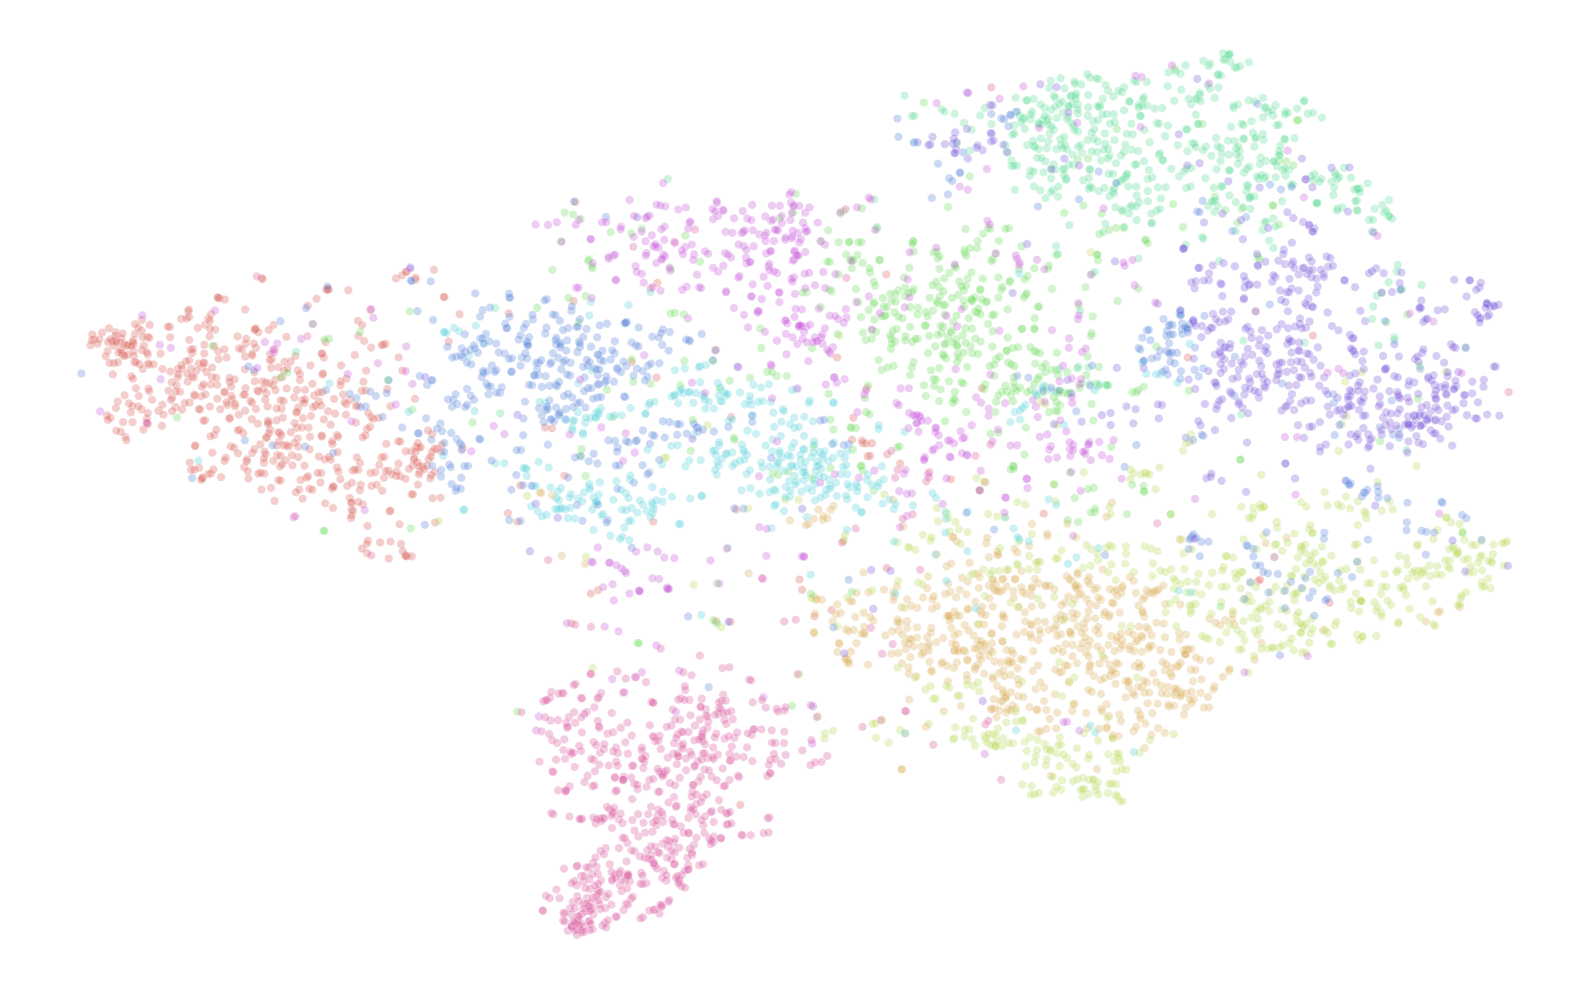

In [3]:
df["tsne-2d-one"] = tsne_results[:, 0]
df["tsne-2d-two"] = tsne_results[:, 1]
plt.figure(figsize=(16, 10))
tsne_plot = sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend=None,
    alpha=0.3,
)

tsne_plot.set(xticklabels=[])  # remove the tick labels
tsne_plot.set(yticklabels=[])  # remove the tick labels
tsne_plot.set(xlabel=None)  # remove the axis label
tsne_plot.set(ylabel=None)  # remove the axis label
tsne_plot.tick_params(bottom=False, left=False)
fig = tsne_plot.get_figure()
plt.axis("off")
plt.tight_layout()
fig.savefig("tsne_eurosat_imagenet_64.png", transparent=False, dpi=200)

In [4]:
size = 224
transforms = nn.Sequential(K.Resize(size)).to(device)
dm = EuroSATMinimal(
    root=ROOT,
    band_set="rgb" if rgb else "all",
    normalization_method="standardization",
    batch_size=64,
    num_workers=8,
    use_both_trainval=False,
)
dm.setup()
model = get_model_by_name(
    model_name, rgb, device=device, dataset=dm.train_dataset, seed=0
)
x_test, y_test = extract_features(
    model, dm.test_dataloader(), device, transforms=transforms, verbose=True
)

x_test_scaled = StandardScaler().fit_transform(x_test)
x_test_pca = PCA(n_components=50).fit_transform(x_test_scaled)
df = pd.DataFrame(x_test_pca)
df["y"] = y_test
tsne = TSNE(
    n_components=2, verbose=2, perplexity=40, n_iter=1000, n_iter_without_progress=300
)
tsne_results = tsne.fit_transform(x_test_pca)

100%|██████████| 85/85 [00:04<00:00, 20.38it/s]
/root/miniconda3/envs/torchgeo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/torchgeo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5400 samples in 0.000s...
[t-SNE] Computed neighbors for 5400 samples in 0.980s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5400
[t-SNE] Computed conditional probabilities for sample 2000 / 5400
[t-SNE] Computed conditional probabilities for sample 3000 / 5400
[t-SNE] Computed conditional probabilities for sample 4000 / 5400
[t-SNE] Computed conditional probabilities for sample 5000 / 5400
[t-SNE] Computed conditional probabilities for sample 5400 / 5400
[t-SNE] Mean sigma: 5.147670
[t-SNE] Computed conditional probabilities in 0.201s
[t-SNE] Iteration 50: error = 85.0675964, gradient norm = 0.0058260 (50 iterations in 0.689s)
[t-SNE] Iteration 100: error = 79.4249115, gradient norm = 0.0057587 (50 iterations in 0.677s)
[t-SNE] Iteration 150: error = 78.9861374, gradient norm = 0.0013780 (50 iterations in 0.671s)
[t-SNE] Iteration 200: error = 78.9200974, gradient norm = 0.0004603 (50 iterations in 0.576s)
[

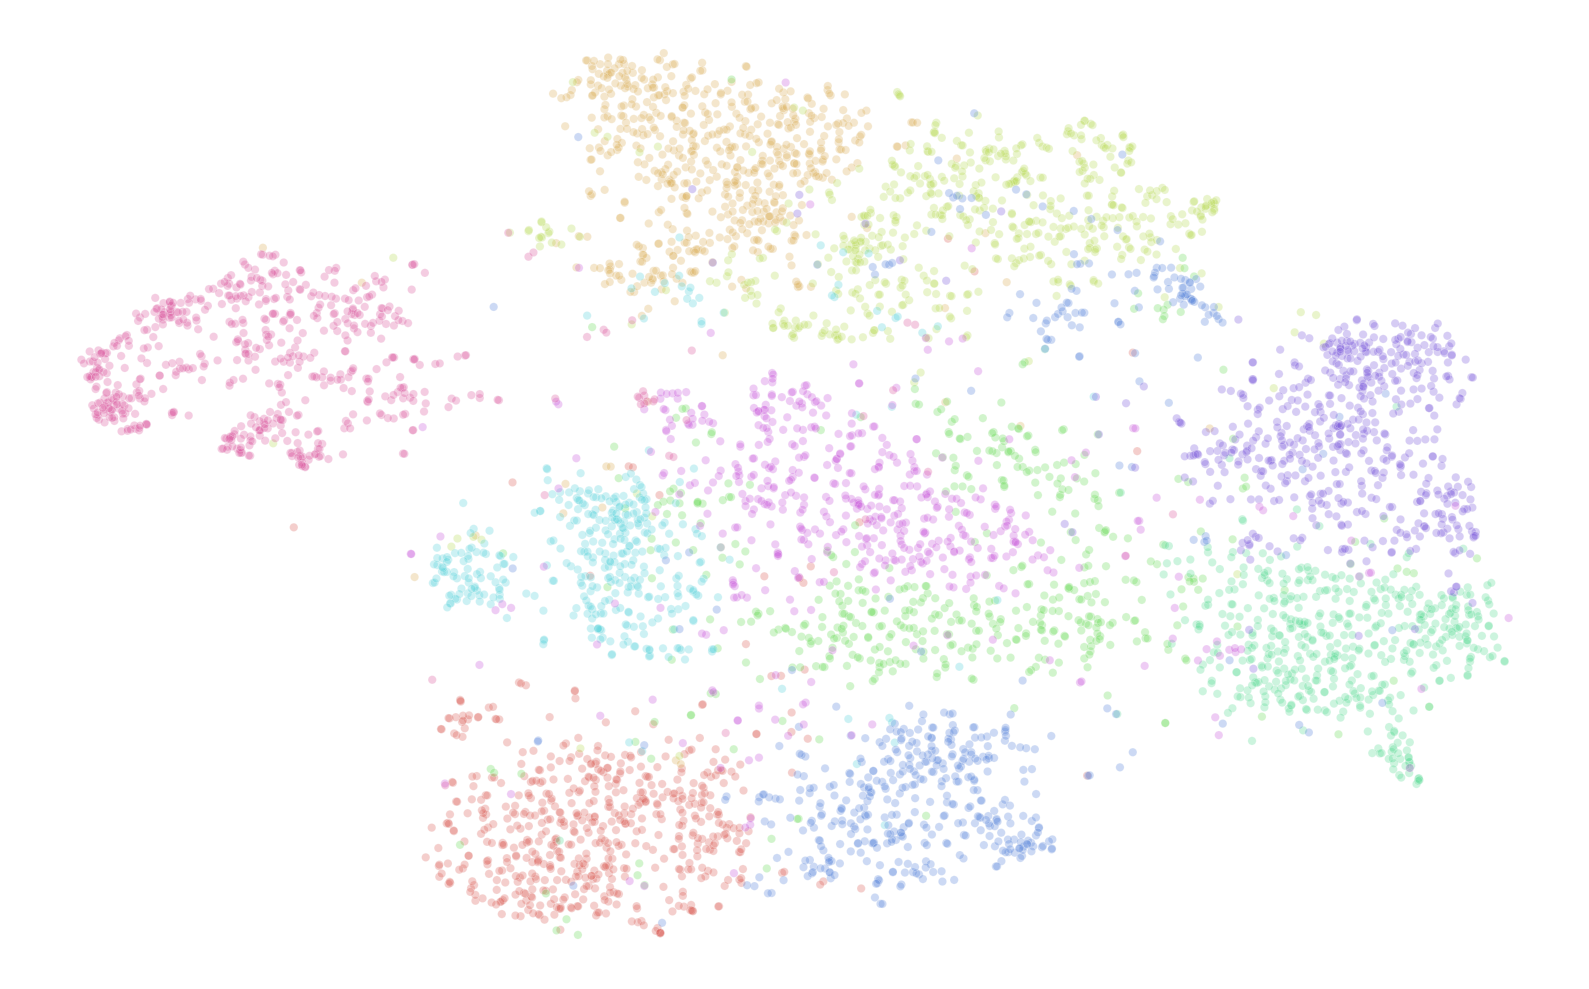

In [5]:
df["tsne-2d-one"] = tsne_results[:, 0]
df["tsne-2d-two"] = tsne_results[:, 1]
plt.figure(figsize=(16, 10))
tsne_plot = sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend=None,
    alpha=0.3,
)

tsne_plot.set(xticklabels=[])  # remove the tick labels
tsne_plot.set(yticklabels=[])  # remove the tick labels
tsne_plot.set(xlabel=None)  # remove the axis label
tsne_plot.set(ylabel=None)  # remove the axis label
tsne_plot.tick_params(bottom=False, left=False)
fig = tsne_plot.get_figure()
plt.axis("off")
plt.tight_layout()
fig.savefig("tsne_eurosat_imagenet_224.png", transparent=False, dpi=200)

In [6]:
size = 224
transforms = nn.Sequential(K.Resize(size)).to(device)
dm = EuroSATMinimal(
    root=ROOT,
    band_set="rgb" if rgb else "all",
    normalization_method="divide",
    batch_size=64,
    num_workers=8,
    use_both_trainval=False,
)
dm.setup()
model = get_model_by_name(
    model_name, rgb, device=device, dataset=dm.train_dataset, seed=0
)
x_test, y_test = extract_features(
    model, dm.test_dataloader(), device, transforms=transforms, verbose=True
)

x_test_scaled = StandardScaler().fit_transform(x_test)
x_test_pca = PCA(n_components=50).fit_transform(x_test_scaled)
df = pd.DataFrame(x_test_pca)
df["y"] = y_test
tsne = TSNE(
    n_components=2, verbose=2, perplexity=40, n_iter=1000, n_iter_without_progress=300
)
tsne_results = tsne.fit_transform(x_test_pca)

100%|██████████| 85/85 [00:04<00:00, 17.78it/s]
/root/miniconda3/envs/torchgeo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/envs/torchgeo/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5400 samples in 0.001s...
[t-SNE] Computed neighbors for 5400 samples in 0.764s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5400
[t-SNE] Computed conditional probabilities for sample 2000 / 5400
[t-SNE] Computed conditional probabilities for sample 3000 / 5400
[t-SNE] Computed conditional probabilities for sample 4000 / 5400
[t-SNE] Computed conditional probabilities for sample 5000 / 5400
[t-SNE] Computed conditional probabilities for sample 5400 / 5400
[t-SNE] Mean sigma: 0.082527
[t-SNE] Computed conditional probabilities in 0.196s
[t-SNE] Iteration 50: error = 80.2167816, gradient norm = 0.0449069 (50 iterations in 0.681s)
[t-SNE] Iteration 100: error = 72.8147202, gradient norm = 0.0047947 (50 iterations in 0.627s)
[t-SNE] Iteration 150: error = 72.1233444, gradient norm = 0.0023223 (50 iterations in 0.625s)
[t-SNE] Iteration 200: error = 71.9004440, gradient norm = 0.0012460 (50 iterations in 0.628s)
[

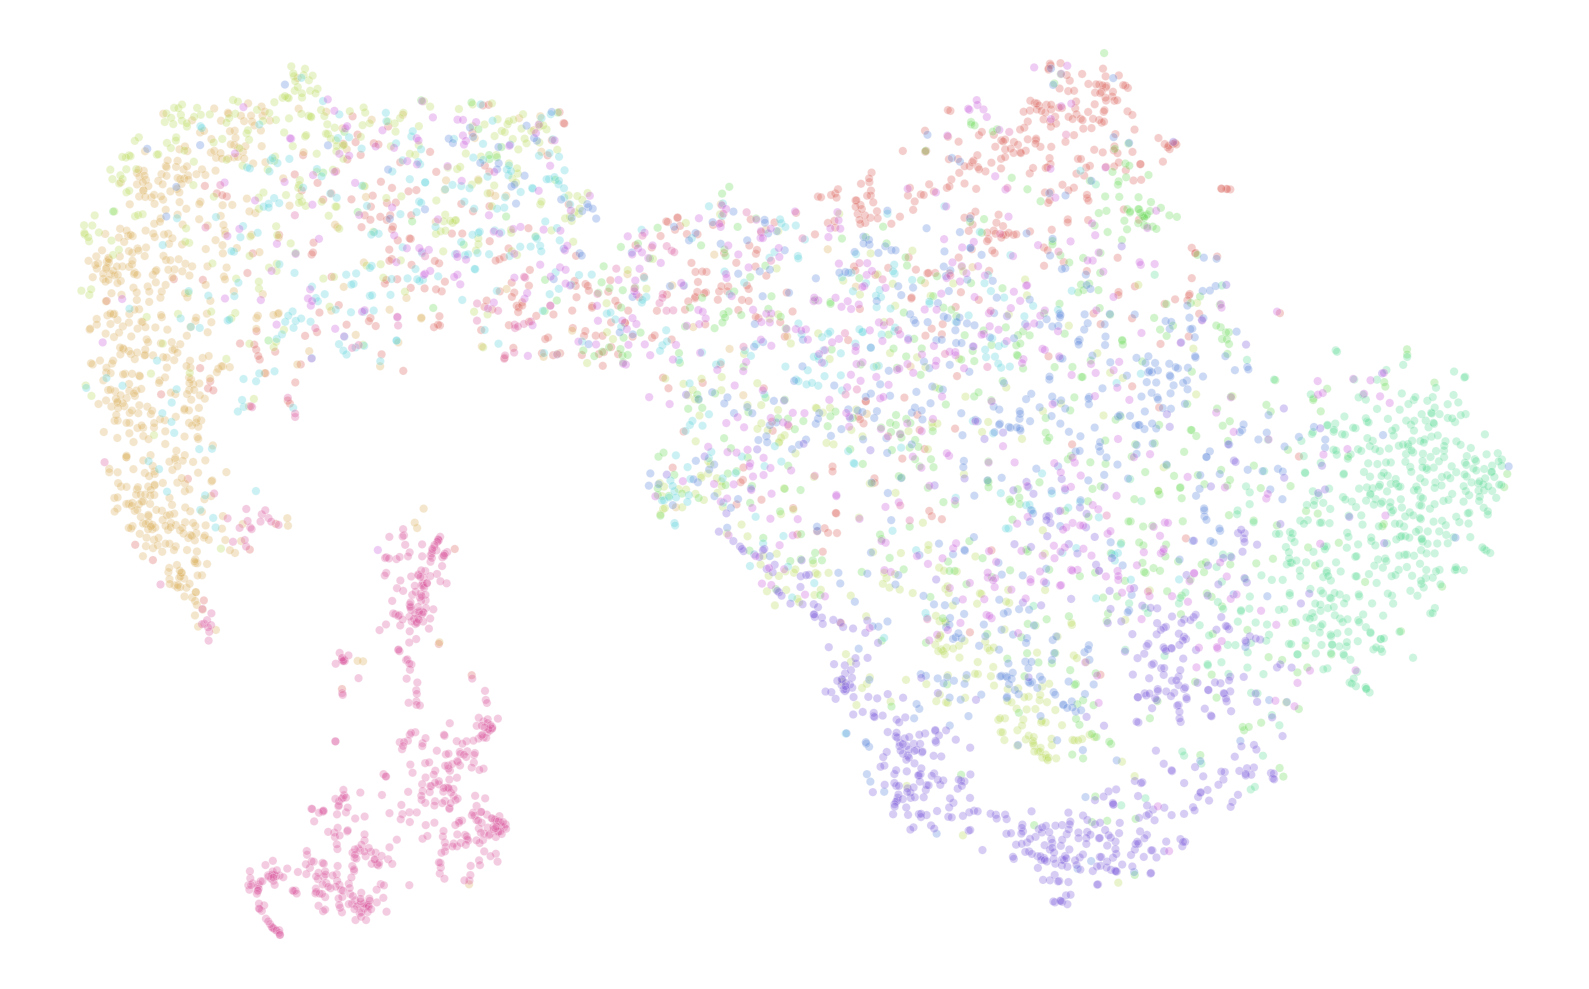

In [7]:
df["tsne-2d-one"] = tsne_results[:, 0]
df["tsne-2d-two"] = tsne_results[:, 1]
plt.figure(figsize=(16, 10))
tsne_plot = sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend=None,
    alpha=0.3,
)

tsne_plot.set(xticklabels=[])  # remove the tick labels
tsne_plot.set(yticklabels=[])  # remove the tick labels
tsne_plot.set(xlabel=None)  # remove the axis label
tsne_plot.set(ylabel=None)  # remove the axis label
tsne_plot.tick_params(bottom=False, left=False)
fig = tsne_plot.get_figure()
plt.axis("off")
plt.tight_layout()
fig.savefig("tsne_eurosat_nostdscaling_imagenet_224.png", transparent=False, dpi=200)